In [1]:
#Import necessary Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline
import pandas_datareader as pdr 

In [2]:
url = 'https://raw.githubusercontent.com/sinlord/stockprice-prediction/main/ADANIENT-NS.csv'
dataframe1 = pd.read_csv(url)

In [3]:
dataframe1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,74.399712,75.495628,73.663994,75.104774,70.727570,3946806.0
1,2015-01-02,75.304039,76.177704,75.104774,75.472641,71.073990,6565229.0
2,2015-01-05,75.273384,77.641479,75.212074,76.721832,72.250381,9404837.0
3,2015-01-06,75.963120,79.381149,74.215782,76.139381,71.701874,18412441.0
4,2015-01-07,76.637527,77.794754,73.878578,75.464973,71.066772,10863352.0


In [4]:
dataframe1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1225,2019-12-24,214.550003,216.949997,207.600006,209.149994,207.405228,2984621.0
1226,2019-12-26,208.949997,211.100006,205.600006,208.949997,207.206879,3299177.0
1227,2019-12-27,209.050003,211.199997,207.100006,209.100006,207.355637,2240503.0
1228,2019-12-30,209.899994,211.600006,208.000000,208.649994,206.909378,1938731.0
1229,2019-12-31,208.699997,210.750000,207.649994,208.350006,206.611893,1600059.0


In [5]:
dataframe1 = dataframe1.dropna()

In [6]:
df1=dataframe1.reset_index()['Close']

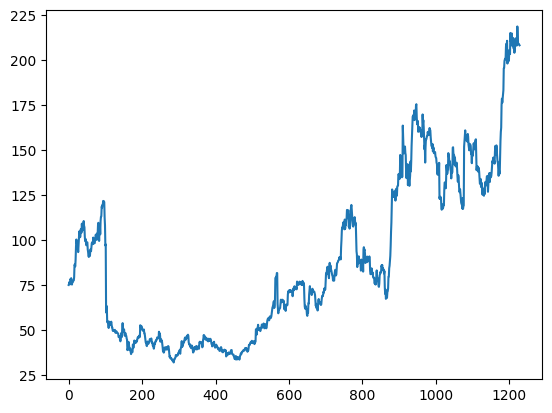

In [7]:
plt.plot(df1)

In [8]:
#Since LSTM are sensitive to the scale of the data, so we apply MinMax Scaler to transform our values between 0 and 1

In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1.shape

(1229, 1)

In [11]:
df1

array([[0.23070028],
       [0.23266973],
       [0.23935751],
       ...,
       [0.94806922],
       [0.94566   ],
       [0.94405396]])

In [12]:
print(np.any(np.isnan(df1)))

False


In [13]:
##splitting dataset into train and test split - 70% train and 30% test
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(860, 369)

In [15]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(759, 100)
(759,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)

(268, 100)
(268,)


(None, None)

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
### Create the Stacked LSTM model

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(y_train)))

False
False


In [24]:
X_train

array([[[0.23070028],
        [0.23266973],
        [0.23935751],
        ...,
        [0.47728675],
        [0.43133386],
        [0.4081933 ]],

       [[0.23266973],
        [0.23935751],
        [0.23623925],
        ...,
        [0.43133386],
        [0.4081933 ],
        [0.34808531]],

       [[0.23935751],
        [0.23623925],
        [0.23262868],
        ...,
        [0.4081933 ],
        [0.34808531],
        [0.35132664]],

       ...,

       [[0.42489487],
        [0.42810384],
        [0.45406719],
        ...,
        [0.28358378],
        [0.29011035],
        [0.27482445]],

       [[0.42810384],
        [0.45406719],
        [0.45100411],
        ...,
        [0.29011035],
        [0.27482445],
        [0.28117925]],

       [[0.45406719],
        [0.45100411],
        [0.44502377],
        ...,
        [0.27482445],
        [0.28117925],
        [0.27465269]]])

In [31]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 534ms/step - loss: 3.6975e-04 - val_loss: 0.0711
Epoch 2/100
12/12 [==============================] - 5s 409ms/step - loss: 3.6554e-04 - val_loss: 0.0839
Epoch 3/100
12/12 [==============================] - 5s 404ms/step - loss: 3.5363e-04 - val_loss: 0.0956
Epoch 4/100
12/12 [==============================] - 6s 516ms/step - loss: 3.6899e-04 - val_loss: 0.0921
Epoch 5/100
12/12 [==============================] - 5s 409ms/step - loss: 3.5152e-04 - val_loss: 0.0904
Epoch 6/100
12/12 [==============================] - 6s 527ms/step - loss: 4.1014e-04 - val_loss: 0.0636
Epoch 7/100
12/12 [==============================] - 5s 405ms/step - loss: 3.7560e-04 - val_loss: 0.0655
Epoch 8/100
12/12 [==============================] - 6s 484ms/step - loss: 3.4034e-04 - val_loss: 0.0679
Epoch 9/100
12/12 [==============================] - 5s 429ms/step - loss: 3.1181e-04 - val_loss: 0.0593
Epoch 10/100
12/12 [==============================] - 5

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

61.372849304179056

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

133.63129912430722

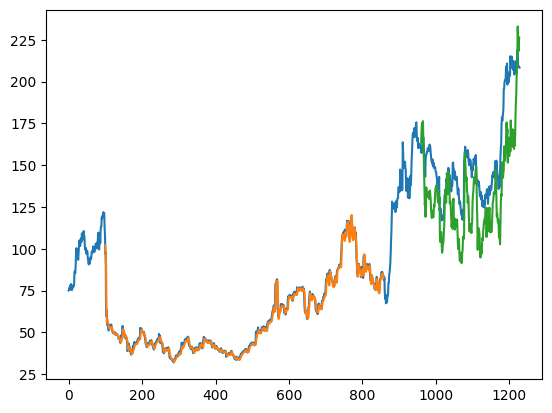

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()